In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
import pandas as pd

# Load the dataset
file_path = r'D:\Ireland\TCD\ESG ANALYTICS\Group Project\Group Project\emission_stock.csv'
data = pd.read_csv(file_path)

# Selecting relevant columns
columns_to_aggregate = ['parent_entity', 'year', 'product_emissions_MtCO2', 
                        'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
                        'Year_Avg_Close', 'Year_End_Close', 'Year_High_Close', 
                        'Year_Low_Close', 'Yearly_Return']

df = data[columns_to_aggregate]

# Convert columns to numeric where applicable (to avoid the aggregation error)
df['product_emissions_MtCO2'] = pd.to_numeric(df['product_emissions_MtCO2'], errors='coerce')
df['total_operational_emissions_MtCO2e'] = pd.to_numeric(df['total_operational_emissions_MtCO2e'], errors='coerce')
df['total_emissions_MtCO2e'] = pd.to_numeric(df['total_emissions_MtCO2e'], errors='coerce')
df['Year_Avg_Close'] = pd.to_numeric(df['Year_Avg_Close'], errors='coerce')
df['Year_End_Close'] = pd.to_numeric(df['Year_End_Close'], errors='coerce')
df['Year_High_Close'] = pd.to_numeric(df['Year_High_Close'], errors='coerce')
df['Year_Low_Close'] = pd.to_numeric(df['Year_Low_Close'], errors='coerce')
df['Yearly_Return'] = pd.to_numeric(df['Yearly_Return'], errors='coerce')

# Grouping by company and year and applying appropriate aggregation
df_cleaned = df.groupby(['parent_entity', 'year']).agg({
    'product_emissions_MtCO2': 'sum',  # Sum of Scope 3 CO2 emissions
    'total_operational_emissions_MtCO2e': 'sum',  # Sum of Scope 1 CO2 emissions
    'total_emissions_MtCO2e': 'sum',  # Sum of total CO2 emissions
    'Year_Avg_Close': 'mean',  # Average stock price for the year
    'Year_End_Close': 'mean',  # Average year-end stock price
    'Year_High_Close': 'mean',  # Average high stock price for the year
    'Year_Low_Close': 'mean',  # Average low stock price for the year
    'Yearly_Return': 'mean'  # Average return for the year
}).reset_index()

# Check the first few rows to ensure the data has been aggregated correctly
df_cleaned.head()

C:\Users\32812\AppData\Local\Temp\ipykernel_32388\10166119.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_emissions_MtCO2'] = pd.to_numeric(df['product_emissions_MtCO2'], errors='coerce')
C:\Users\32812\AppData\Local\Temp\ipykernel_32388\10166119.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_operational_emissions_MtCO2e'] = pd.to_numeric(df['total_operational_emissions_MtCO2e'], errors='coerce')
C:\Users\32812\AppData\Local\Temp\ipykernel_32388\10166119.py:22: SettingWithC

,parent_entity,year,product_emissions_MtCO2,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,Year_Avg_Close,Year_End_Close,Year_High_Close,Year_Low_Close,Yearly_Return
0,APA Corporation,1985,2.803984,0.806399,3.610383,2.703778,2.659818,3.251358,2.353881,0.102071
1,APA Corporation,1986,2.803984,0.806399,3.610383,2.254909,2.272421,2.934972,1.895390,-0.145648
2,APA Corporation,1987,2.930733,0.850501,3.781234,2.598212,1.952387,3.207013,1.709277,-0.140834
3,APA Corporation,1988,3.667909,1.092600,4.760510,2.019116,2.130814,2.310322,1.608815,0.091389
4,APA Corporation,1989,5.680966,1.736916,7.417882,3.413467,5.083050,5.083050,2.130814,1.385497


Pearson correlation between product_emissions_MtCO2 and Year_Avg_Close: -0.04693029386849599
Spearman correlation between product_emissions_MtCO2 and Year_Avg_Close: 0.1266908457914644
Pearson correlation between product_emissions_MtCO2 and Yearly_Return: -0.007859351251701976
Spearman correlation between product_emissions_MtCO2 and Yearly_Return: -0.038453956097851946
Pearson correlation between total_operational_emissions_MtCO2e and Year_Avg_Close: -0.04203174855524976
Spearman correlation between total_operational_emissions_MtCO2e and Year_Avg_Close: 0.10336375450135285
Pearson correlation between total_operational_emissions_MtCO2e and Yearly_Return: -0.017869291734556682
Spearman correlation between total_operational_emissions_MtCO2e and Yearly_Return: -0.045461230243342275
Pearson correlation between total_emissions_MtCO2e and Year_Avg_Close: -0.0464690259806135
Spearman correlation between total_emissions_MtCO2e and Year_Avg_Close: 0.12464279759173265
Pearson correlation between 

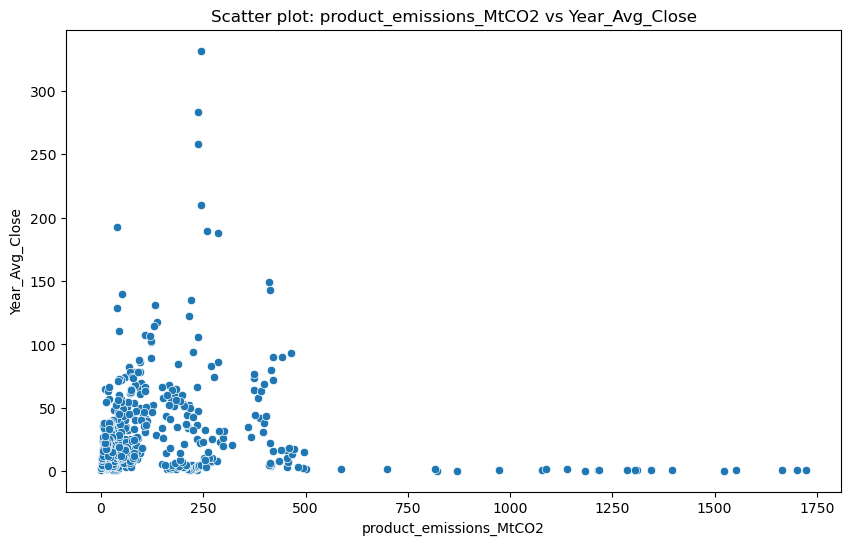

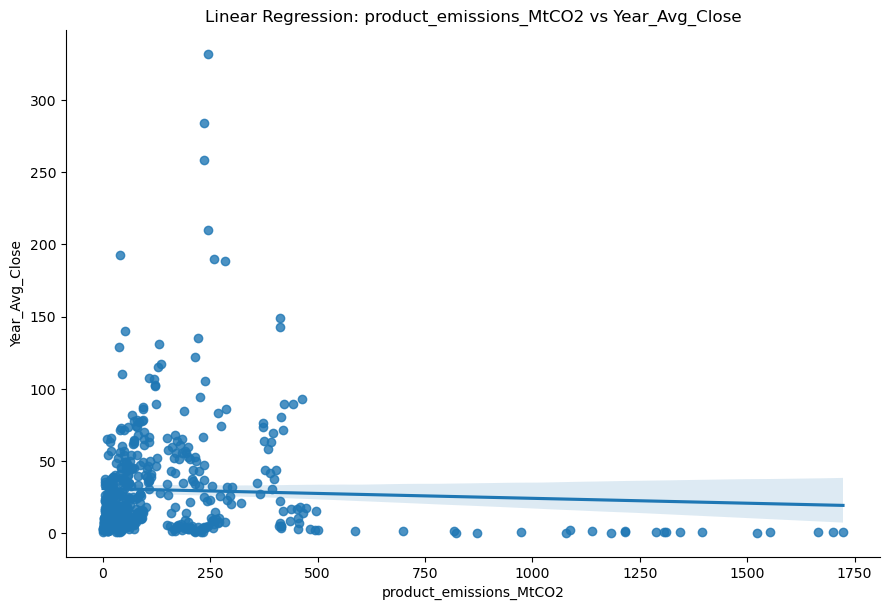

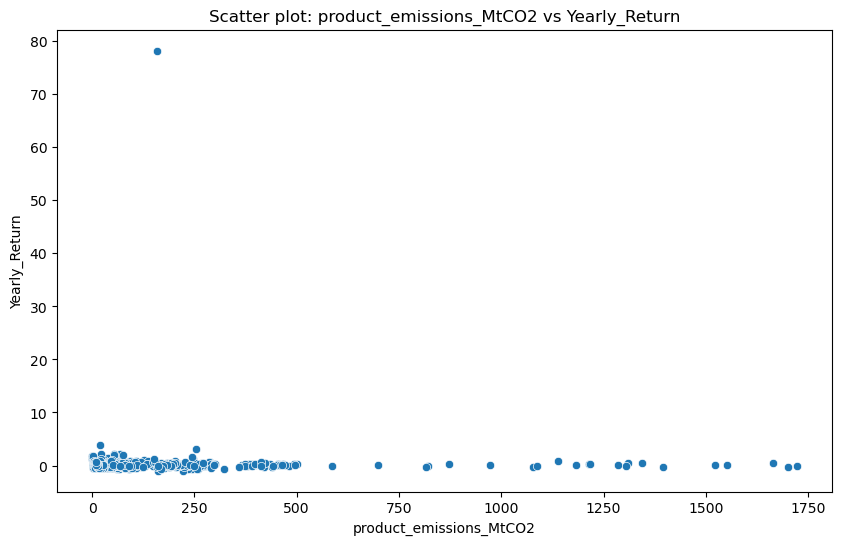

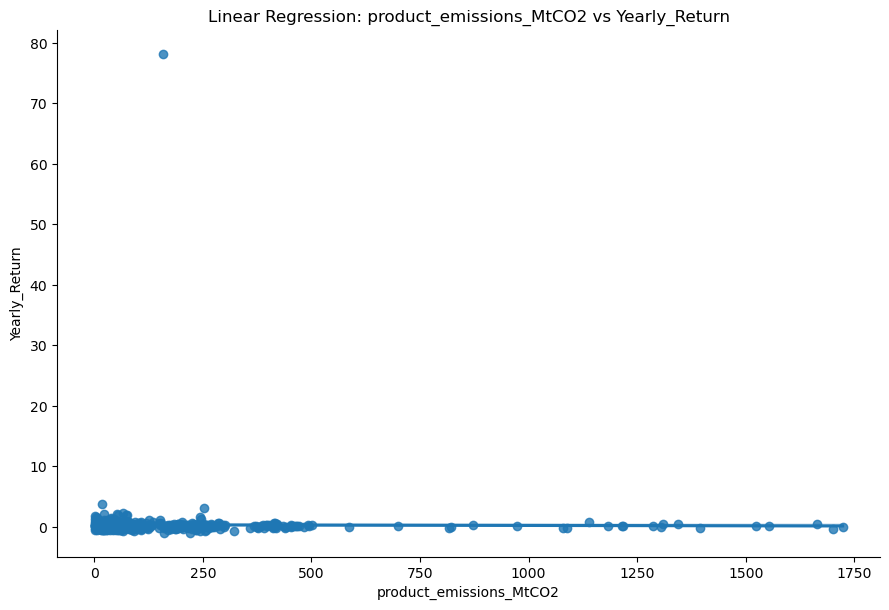

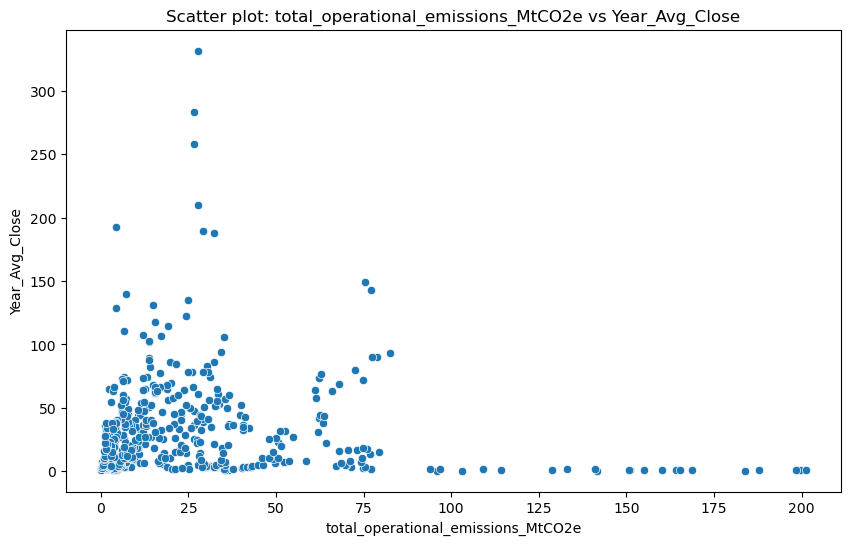

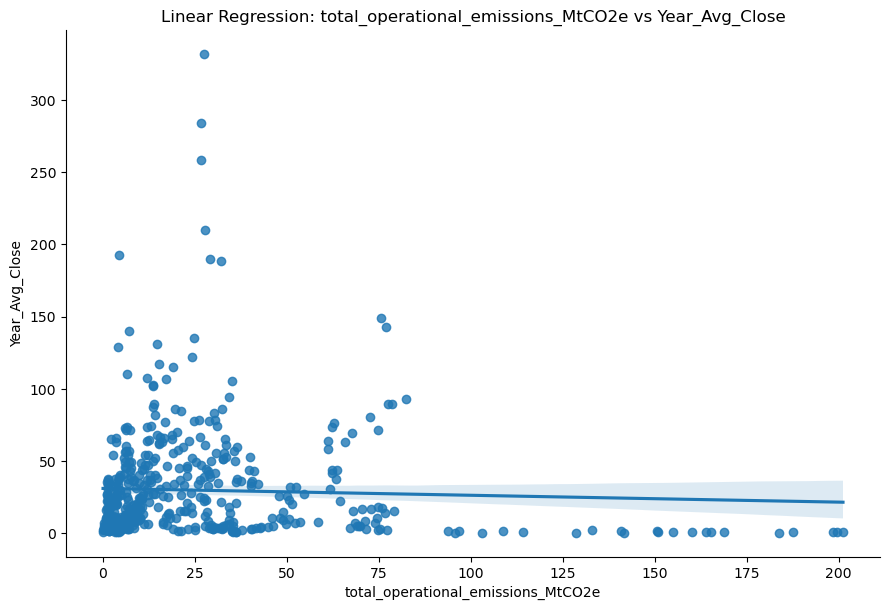

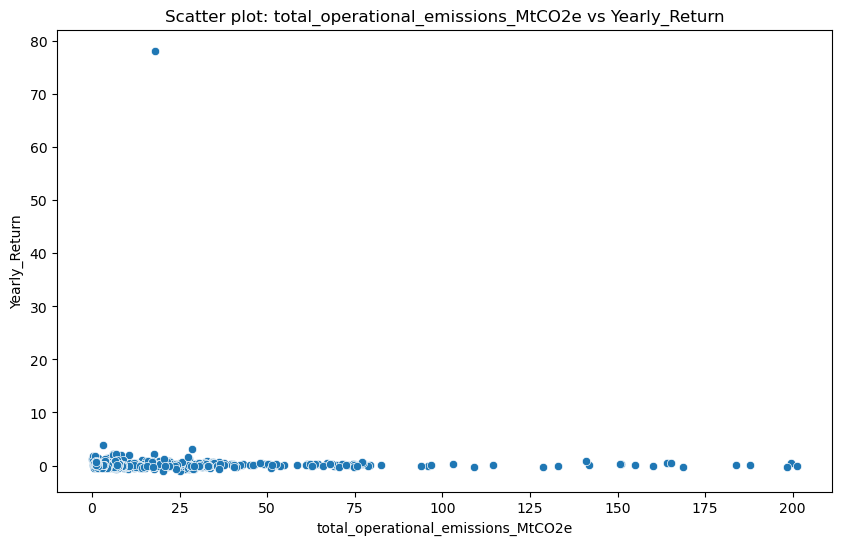

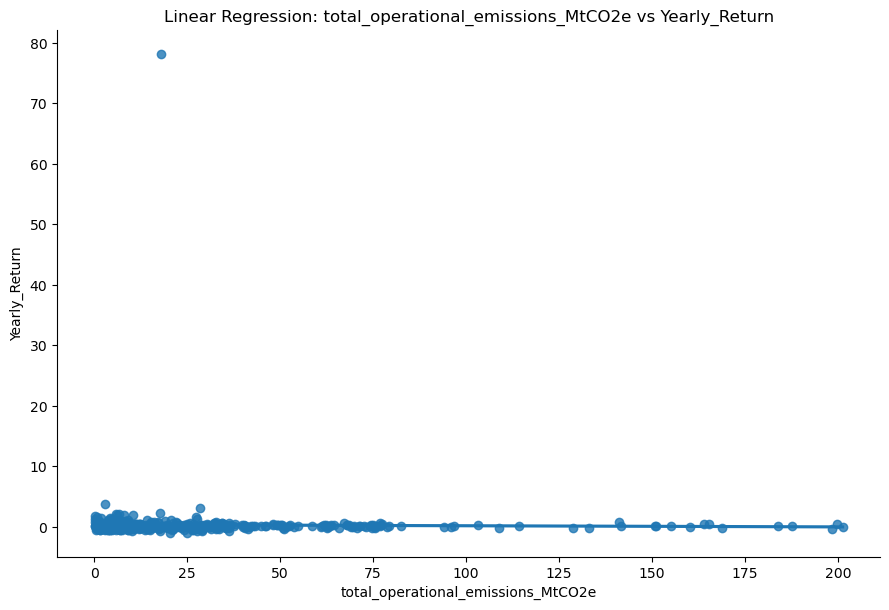

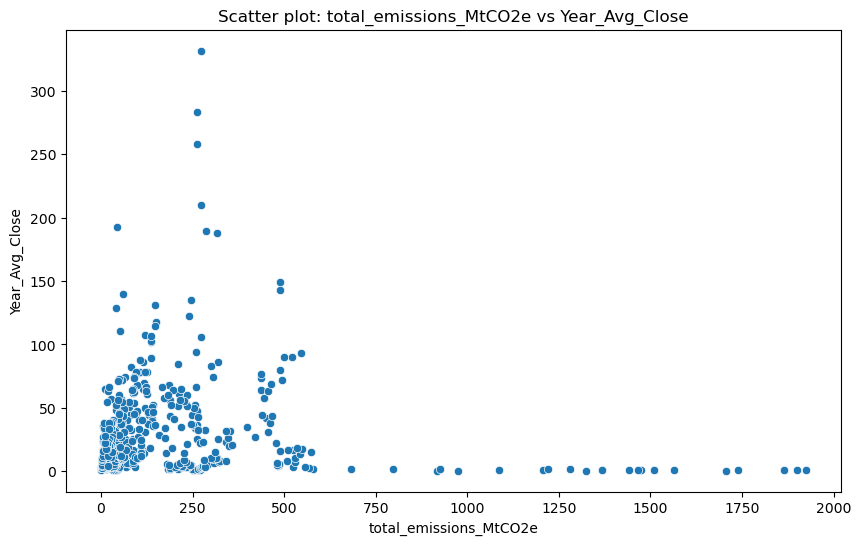

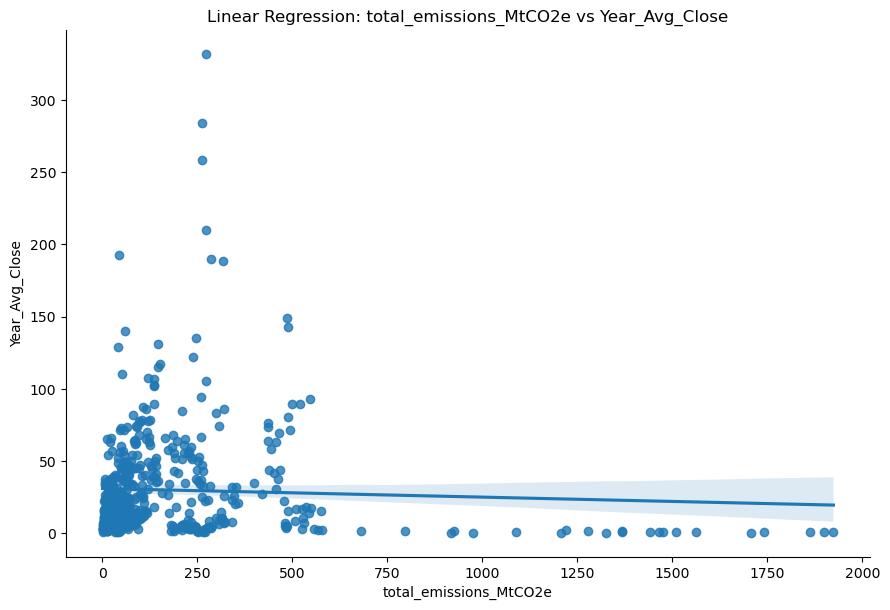

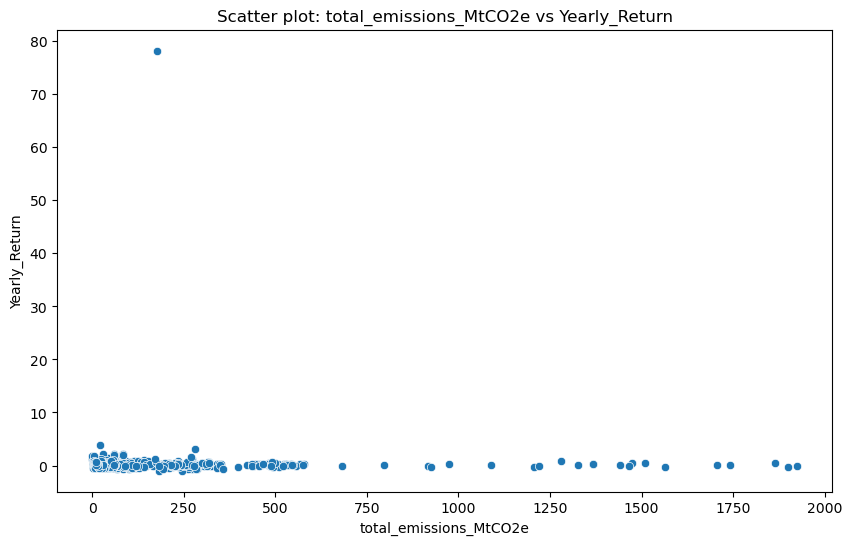

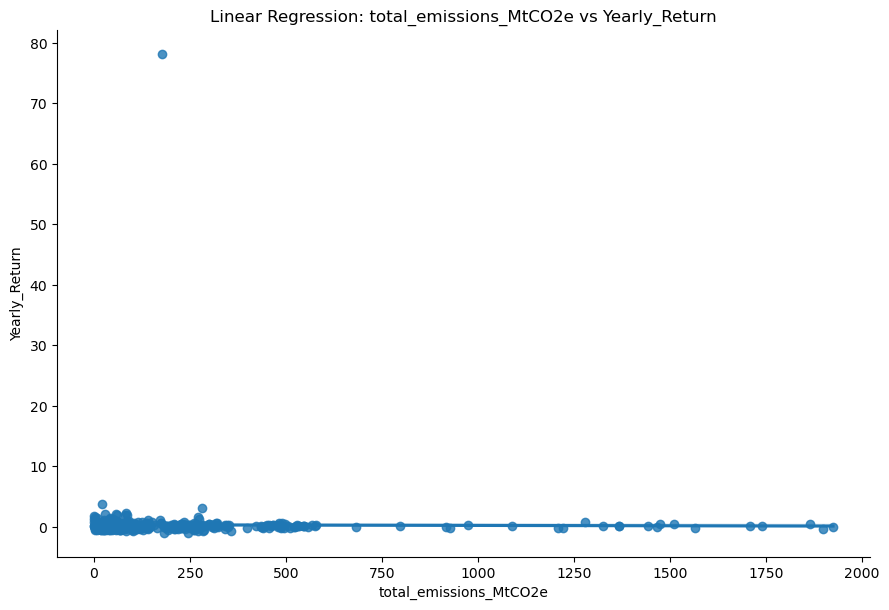

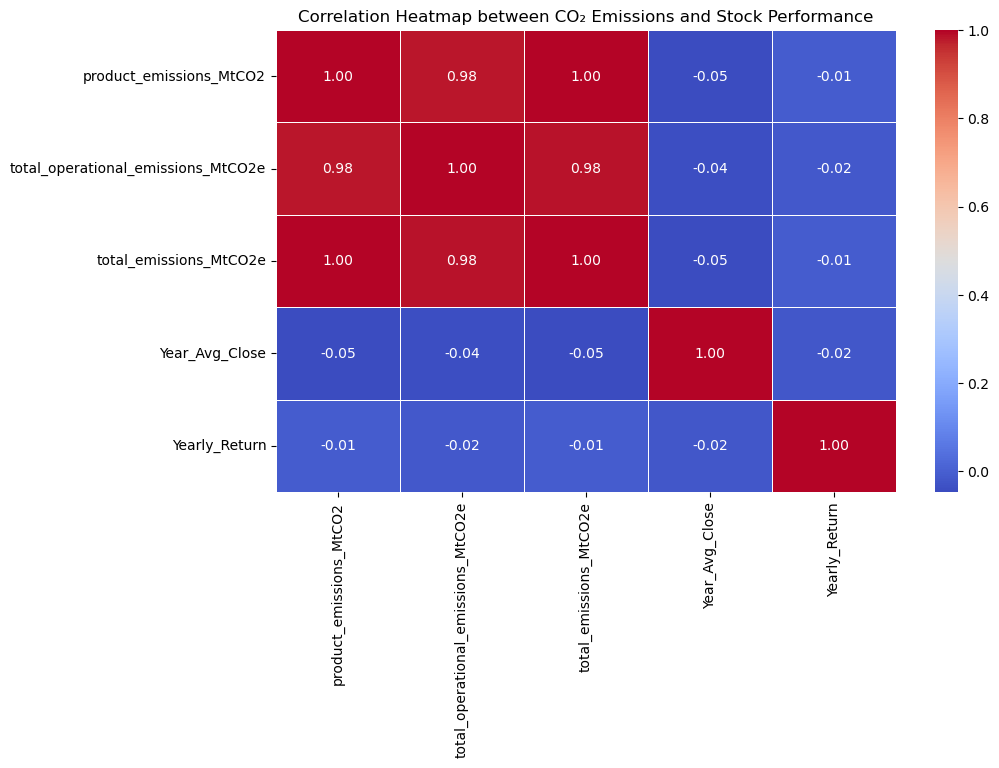

In [8]:
# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Perform correlation analysis (Pearson and Spearman) for Scope 1, Scope 3, and Total emissions
def correlation_analysis(df_cleaned, emissions_col, stock_col):
    # Pearson correlation
    pearson_corr, _ = pearsonr(df_cleaned[emissions_col], df_cleaned[stock_col])
    print(f"Pearson correlation between {emissions_col} and {stock_col}: {pearson_corr}")
    
    # Spearman correlation
    spearman_corr, _ = spearmanr(df_cleaned[emissions_col], df_cleaned[stock_col])
    print(f"Spearman correlation between {emissions_col} and {stock_col}: {spearman_corr}")
    
# Correlation for Scope 3 emissions and stock metrics
correlation_analysis(df_cleaned, 'product_emissions_MtCO2', 'Year_Avg_Close')
correlation_analysis(df_cleaned, 'product_emissions_MtCO2', 'Yearly_Return')

# Correlation for Scope 1 emissions and stock metrics
correlation_analysis(df_cleaned, 'total_operational_emissions_MtCO2e', 'Year_Avg_Close')
correlation_analysis(df_cleaned, 'total_operational_emissions_MtCO2e', 'Yearly_Return')

# Correlation for Total emissions and stock metrics
correlation_analysis(df_cleaned, 'total_emissions_MtCO2e', 'Year_Avg_Close')
correlation_analysis(df_cleaned, 'total_emissions_MtCO2e', 'Yearly_Return')

# Regression Analysis (using Year_Avg_Close as the dependent variable)
def regression_analysis(df_cleaned, emissions_col, stock_col):
    X = df_cleaned[[emissions_col]]  # Independent variable (CO₂ emissions)
    X = sm.add_constant(X)  # Adds a constant term to the model (intercept)
    y = df_cleaned[stock_col]  # Dependent variable (Stock performance)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Output the regression results
    print(f"\nRegression Results for {emissions_col} and {stock_col}:")
    print(model.summary())

# Regression for Scope 3 emissions and stock metrics
regression_analysis(df_cleaned, 'product_emissions_MtCO2', 'Year_Avg_Close')
regression_analysis(df_cleaned, 'product_emissions_MtCO2', 'Yearly_Return')

# Regression for Scope 1 emissions and stock metrics
regression_analysis(df_cleaned, 'total_operational_emissions_MtCO2e', 'Year_Avg_Close')
regression_analysis(df_cleaned, 'total_operational_emissions_MtCO2e', 'Yearly_Return')

# Regression for Total emissions and stock metrics
regression_analysis(df_cleaned, 'total_emissions_MtCO2e', 'Year_Avg_Close')
regression_analysis(df_cleaned, 'total_emissions_MtCO2e', 'Yearly_Return')

# Data Visualization: Scatter plots and regression lines for each case
def plot_scatter_regression(df_cleaned, emissions_col, stock_col):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=emissions_col, y=stock_col, data=df_cleaned)
    plt.title(f"Scatter plot: {emissions_col} vs {stock_col}")
    plt.xlabel(f"{emissions_col}")
    plt.ylabel(f"{stock_col}")
    plt.show()
    
    # Plotting regression line
    sns.lmplot(x=emissions_col, y=stock_col, data=df_cleaned, aspect=1.5, height=6)
    plt.title(f"Linear Regression: {emissions_col} vs {stock_col}")
    plt.xlabel(f"{emissions_col}")
    plt.ylabel(f"{stock_col}")
    plt.show()

# Plot for Scope 3 emissions vs stock metrics
plot_scatter_regression(df_cleaned, 'product_emissions_MtCO2', 'Year_Avg_Close')
plot_scatter_regression(df_cleaned, 'product_emissions_MtCO2', 'Yearly_Return')

# Plot for Scope 1 emissions vs stock metrics
plot_scatter_regression(df_cleaned, 'total_operational_emissions_MtCO2e', 'Year_Avg_Close')
plot_scatter_regression(df_cleaned, 'total_operational_emissions_MtCO2e', 'Yearly_Return')

# Plot for Total emissions vs stock metrics
plot_scatter_regression(df_cleaned, 'total_emissions_MtCO2e', 'Year_Avg_Close')
plot_scatter_regression(df_cleaned, 'total_emissions_MtCO2e', 'Yearly_Return')

# Heatmap of Correlation Matrix
correlation_columns = ['product_emissions_MtCO2', 'total_operational_emissions_MtCO2e', 
                       'total_emissions_MtCO2e', 'Year_Avg_Close', 'Yearly_Return']

# Correlation matrix
corr_matrix = df_cleaned[correlation_columns].corr()

# Plot the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between CO₂ Emissions and Stock Performance')
plt.show()

The analysis showing CO₂ emissions and stock market performance are not strongly correlated, could indeed suggest that ESG concerns, particularly in terms of emissions, have not yet been sufficiently integrated into stock market dynamics. This reflects a broader trend where short-term financial performance still dominates, and environmental impact may not yet be fully considered by investors when evaluating a company's financial health.

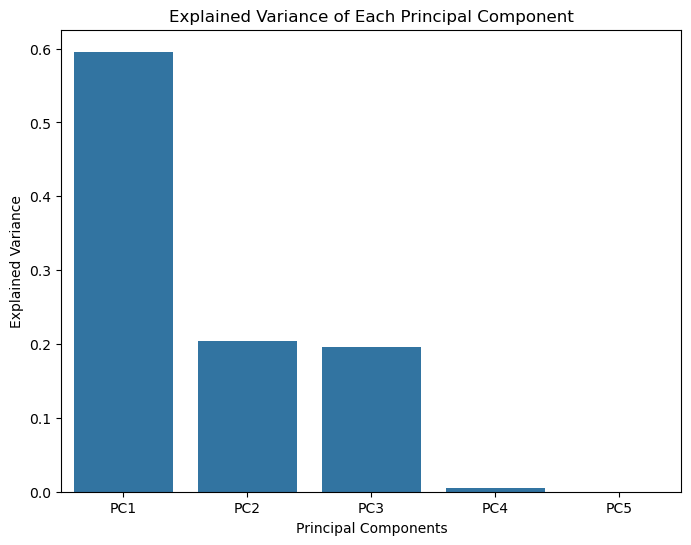

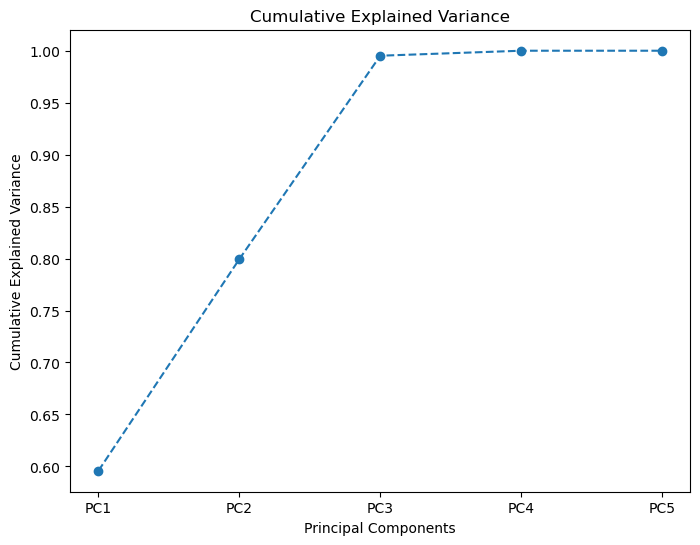

     product_emissions_MtCO2  total_operational_emissions_MtCO2e  \
PC1                 0.577625                            0.574547   
PC2                -0.007445                           -0.017997   
PC3                 0.021847                            0.018135   
PC4                 0.477327                           -0.813686   
PC5                -0.661797                           -0.084606   

     total_emissions_MtCO2e  Year_Avg_Close  Yearly_Return  
PC1                0.578446   -3.938623e-02  -9.736989e-03  
PC2               -0.008659   -6.800665e-01   7.328405e-01  
PC3                0.021470    7.320831e-01   6.802846e-01  
PC4                0.331660    3.547095e-03  -7.922504e-03  
PC5                0.744893   -5.096211e-12   1.028413e-11  


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for PCA
pca_columns = ['product_emissions_MtCO2', 'total_operational_emissions_MtCO2e', 
               'total_emissions_MtCO2e', 'Year_Avg_Close', 'Yearly_Return']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[pca_columns])

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.title('Explained Variance of Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot([f'PC{i+1}' for i in range(len(cumulative_variance))], cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# PCA component loadings (to understand the weight of each variable)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=[f'PC{i+1}' for i in range(len(loadings))])
print(loadings_df)

d:\StudySoftware\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


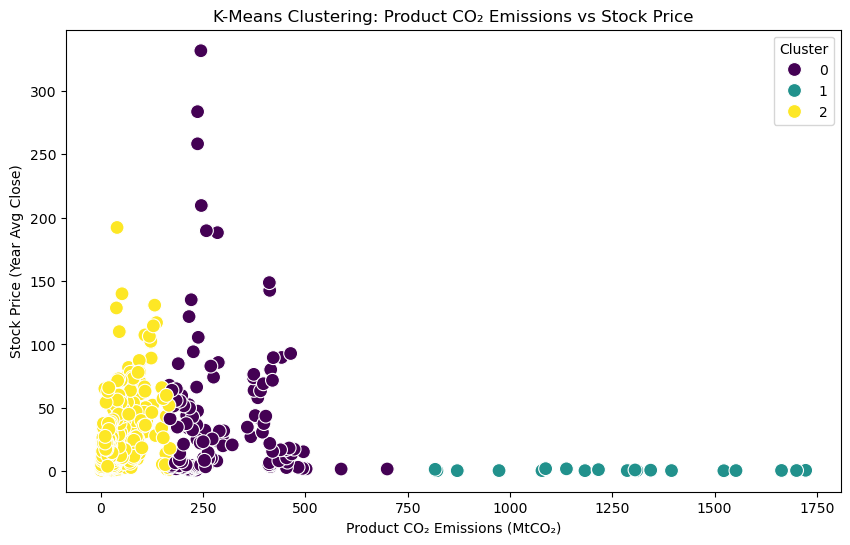

d:\StudySoftware\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


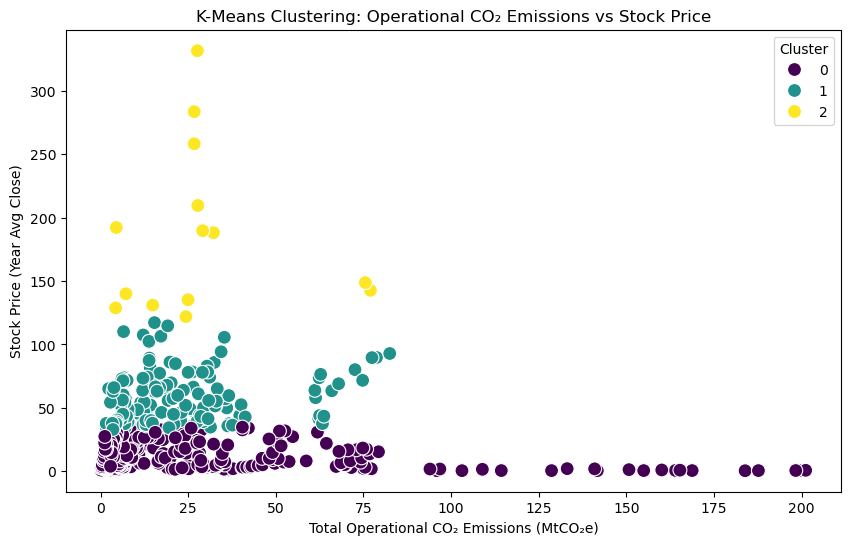

d:\StudySoftware\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


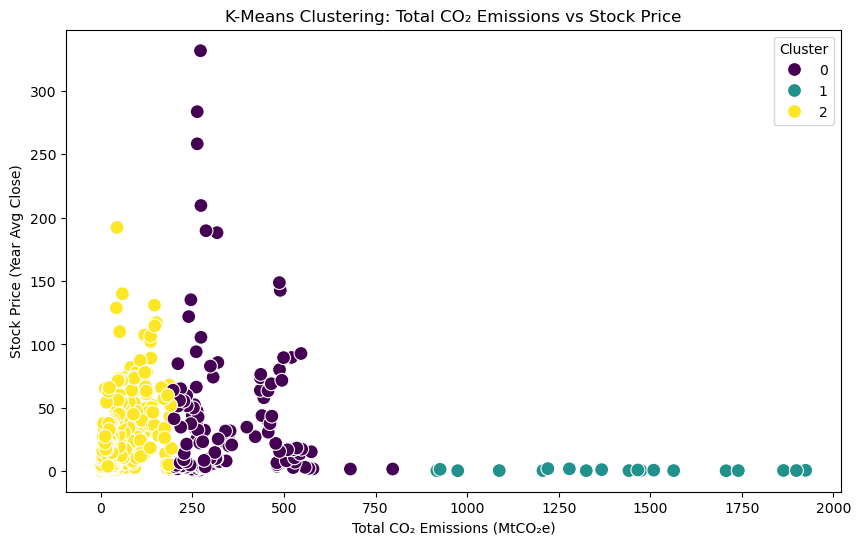

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Function to apply K-Means clustering and plot the results
def kmeans_clustering_plot(x, y, x_label, y_label, title):
    # Reshape data for clustering
    data = pd.DataFrame({'x': x, 'y': y})
    
    # Standardizing the data for K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['x', 'y']])

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='x', y='y', hue='Cluster', data=data, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title='Cluster')
    plt.show()

# K-Means Clustering for Product CO2 Emissions vs Year_Avg_Close
kmeans_clustering_plot(df_cleaned['product_emissions_MtCO2'], df_cleaned['Year_Avg_Close'],
                       'Product CO₂ Emissions (MtCO₂)', 'Stock Price (Year Avg Close)',
                       'K-Means Clustering: Product CO₂ Emissions vs Stock Price')

# K-Means Clustering for Operational CO2 Emissions vs Year_Avg_Close
kmeans_clustering_plot(df_cleaned['total_operational_emissions_MtCO2e'], df_cleaned['Year_Avg_Close'],
                       'Total Operational CO₂ Emissions (MtCO₂e)', 'Stock Price (Year Avg Close)',
                       'K-Means Clustering: Operational CO₂ Emissions vs Stock Price')

# K-Means Clustering for Total CO2 Emissions vs Year_Avg_Close
kmeans_clustering_plot(df_cleaned['total_emissions_MtCO2e'], df_cleaned['Year_Avg_Close'],
                       'Total CO₂ Emissions (MtCO₂e)', 'Stock Price (Year Avg Close)',
                       'K-Means Clustering: Total CO₂ Emissions vs Stock Price')

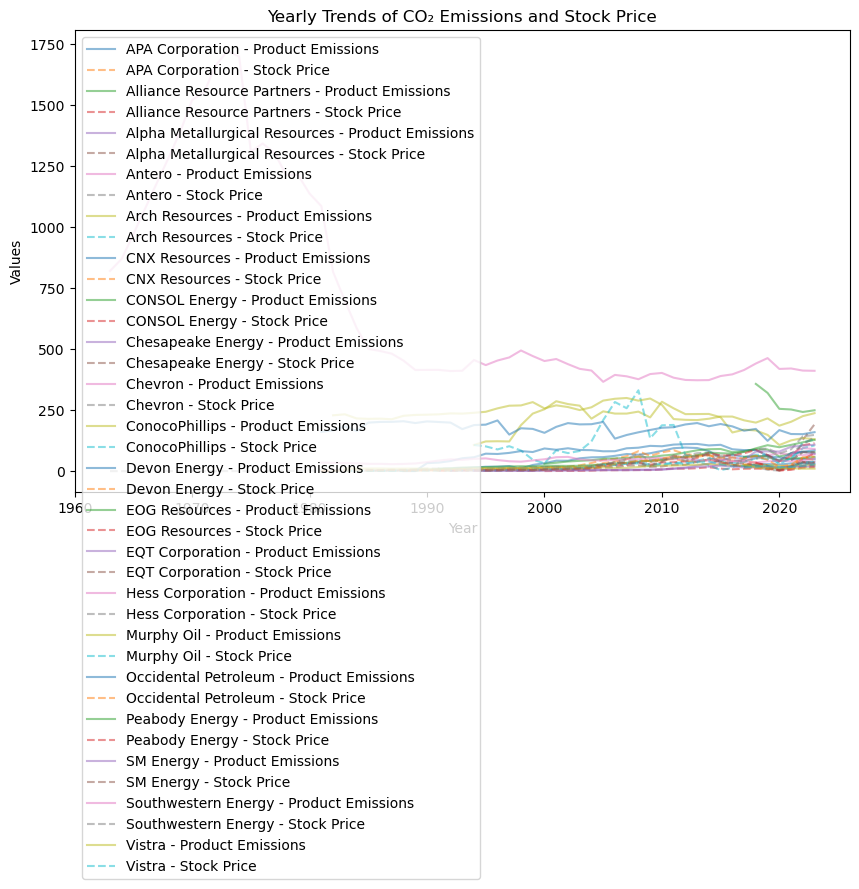

In [13]:
# Plotting the trends of CO₂ emissions and stock performance over the years
plt.figure(figsize=(10, 6))
for company in df_cleaned['parent_entity'].unique():
    company_data = df_cleaned[df_cleaned['parent_entity'] == company]
    plt.plot(company_data['year'], company_data['product_emissions_MtCO2'], label=f'{company} - Product Emissions', alpha=0.5)
    plt.plot(company_data['year'], company_data['Year_Avg_Close'], label=f'{company} - Stock Price', linestyle='--', alpha=0.5)

plt.title('Yearly Trends of CO₂ Emissions and Stock Price')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

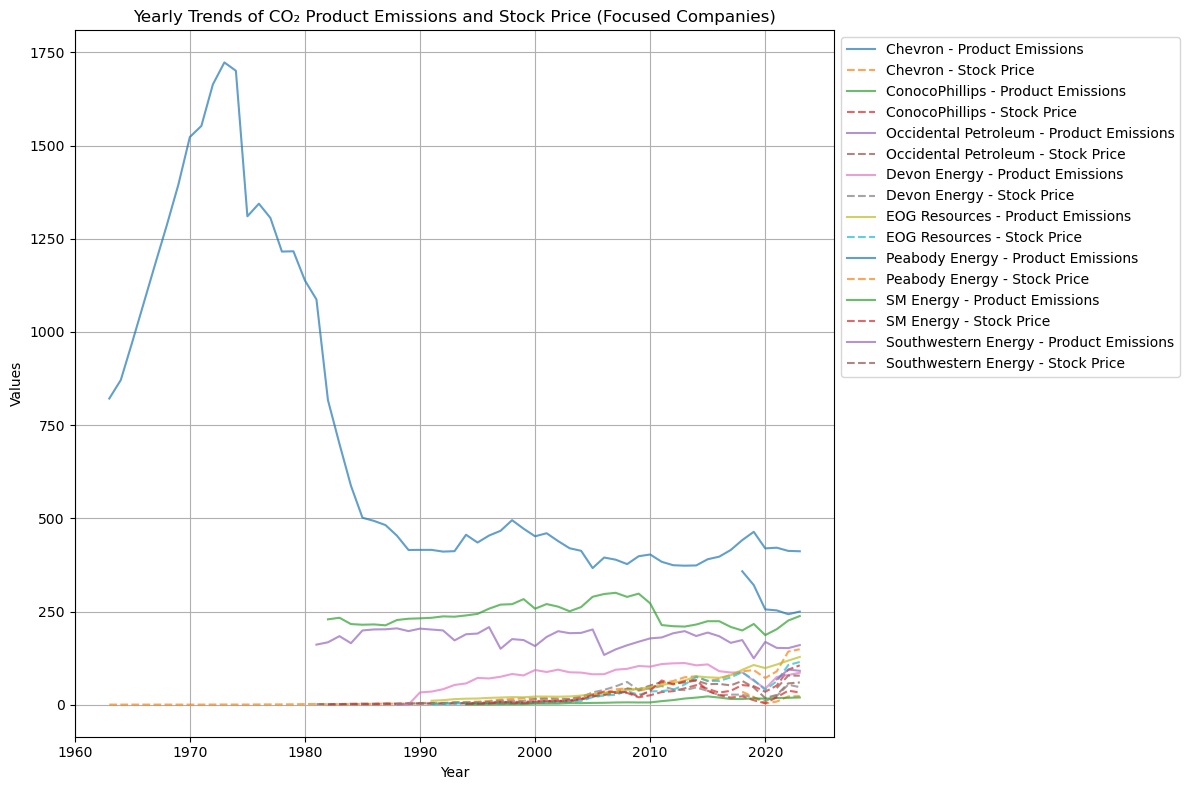

In [15]:
import matplotlib.pyplot as plt

# Select a subset of companies with noticeable trends
companies_to_plot = [
    'Chevron', 'ConocoPhillips', 'Occidental Petroleum', 'Devon Energy', 'EOG Resources', 
    'Peabody Energy', 'SM Energy', 'Southwestern Energy'
]

# Filter the data for the selected companies
df_filtered = df_cleaned[df_cleaned['parent_entity'].isin(companies_to_plot)]

# Plotting
plt.figure(figsize=(12, 8))

# Plot each selected company
for company in companies_to_plot:
    company_data = df_filtered[df_filtered['parent_entity'] == company]
    
    # Plot Product CO2 Emissions
    plt.plot(company_data['year'], company_data['product_emissions_MtCO2'], label=f'{company} - Product Emissions', linestyle='-', alpha=0.7)
    
    # Plot Stock Price
    plt.plot(company_data['year'], company_data['Year_Avg_Close'], label=f'{company} - Stock Price', linestyle='--', alpha=0.7)

plt.title('Yearly Trends of CO₂ Product Emissions and Stock Price (Focused Companies)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

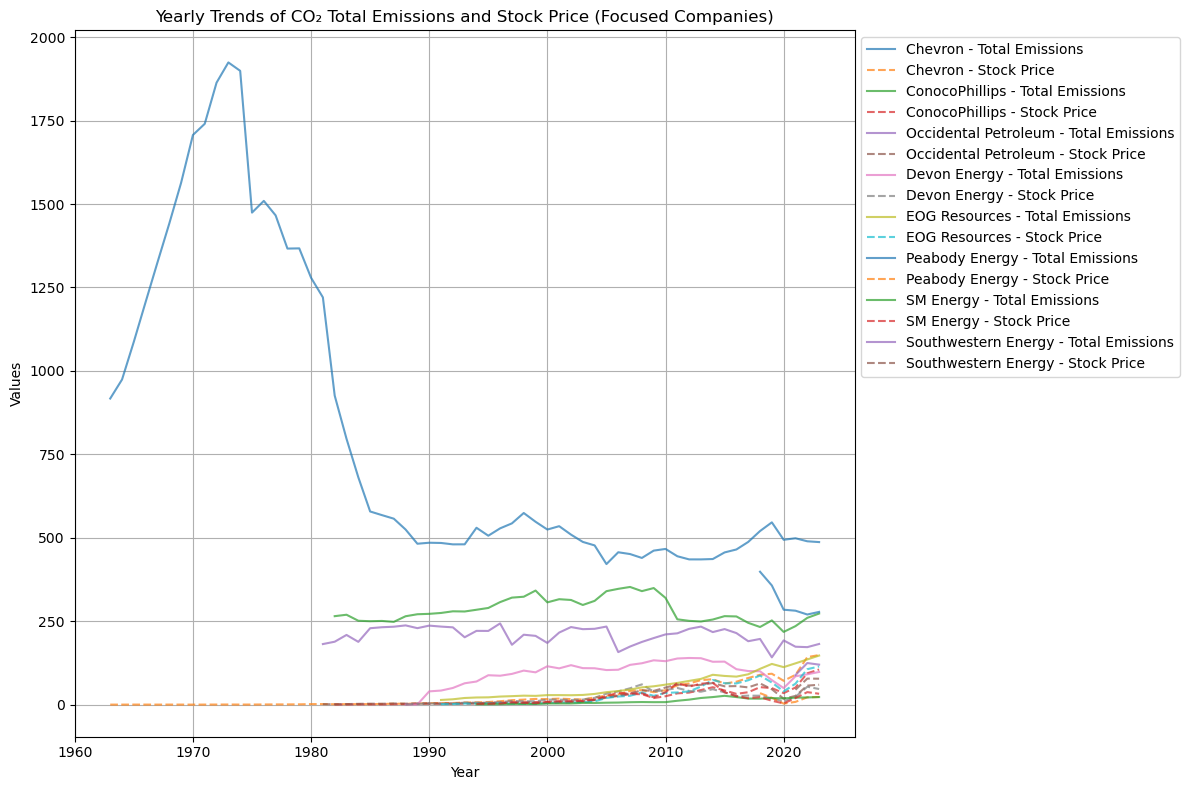

In [17]:
import matplotlib.pyplot as plt

# Select a subset of companies with noticeable trends
companies_to_plot = [
    'Chevron', 'ConocoPhillips', 'Occidental Petroleum', 'Devon Energy', 'EOG Resources', 
    'Peabody Energy', 'SM Energy', 'Southwestern Energy'
]

# Filter the data for the selected companies
df_filtered = df_cleaned[df_cleaned['parent_entity'].isin(companies_to_plot)]

# Plotting
plt.figure(figsize=(12, 8))

# Plot each selected company
for company in companies_to_plot:
    company_data = df_filtered[df_filtered['parent_entity'] == company]
    
    # Plot Total CO2 Emissions
    plt.plot(company_data['year'], company_data['total_emissions_MtCO2e'], label=f'{company} - Total Emissions', linestyle='-', alpha=0.7)
    
    # Plot Stock Price
    plt.plot(company_data['year'], company_data['Year_Avg_Close'], label=f'{company} - Stock Price', linestyle='--', alpha=0.7)

plt.title('Yearly Trends of CO₂ Total Emissions and Stock Price (Focused Companies)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

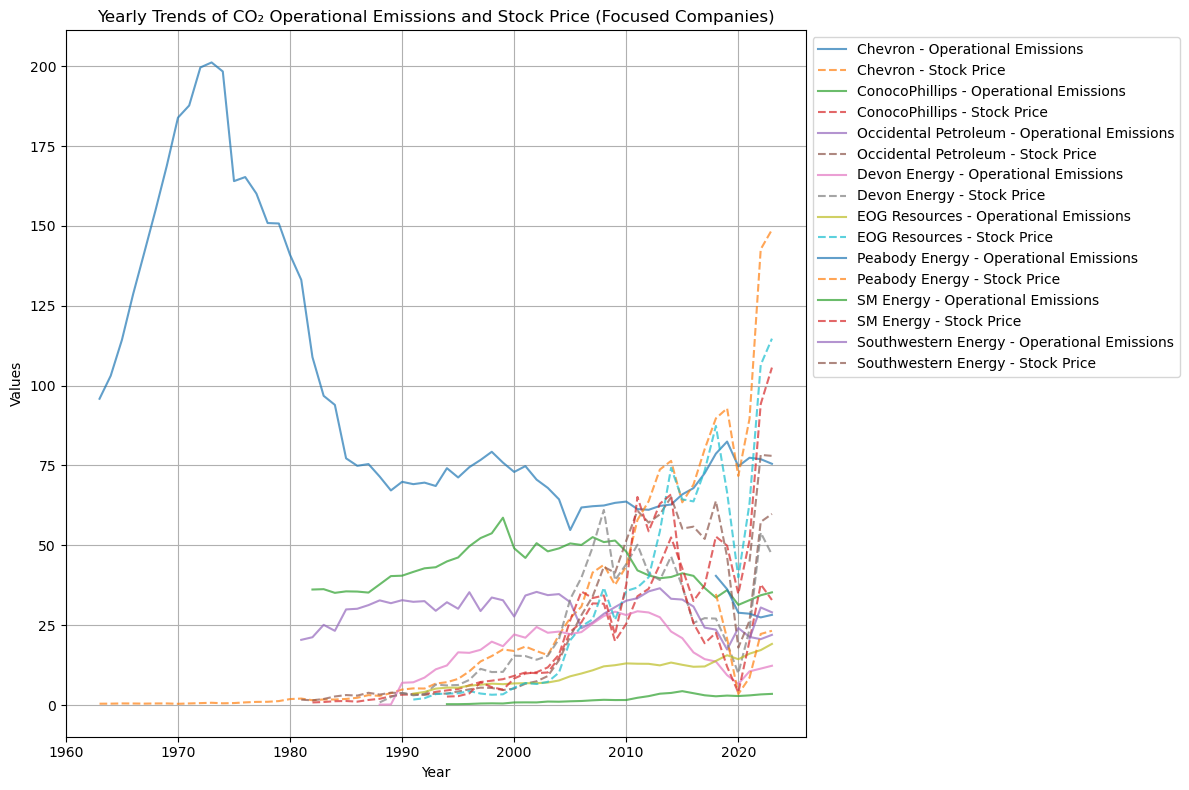

In [18]:
import matplotlib.pyplot as plt

# Select a subset of companies with noticeable trends
companies_to_plot = [
    'Chevron', 'ConocoPhillips', 'Occidental Petroleum', 'Devon Energy', 'EOG Resources', 
    'Peabody Energy', 'SM Energy', 'Southwestern Energy'
]

# Filter the data for the selected companies
df_filtered = df_cleaned[df_cleaned['parent_entity'].isin(companies_to_plot)]

# Plotting
plt.figure(figsize=(12, 8))

# Plot each selected company
for company in companies_to_plot:
    company_data = df_filtered[df_filtered['parent_entity'] == company]
    
    # Plot Total CO2 Emissions
    plt.plot(company_data['year'], company_data['total_operational_emissions_MtCO2e'], label=f'{company} - Operational Emissions', linestyle='-', alpha=0.7)
    
    # Plot Stock Price
    plt.plot(company_data['year'], company_data['Year_Avg_Close'], label=f'{company} - Stock Price', linestyle='--', alpha=0.7)

plt.title('Yearly Trends of CO₂ Operational Emissions and Stock Price (Focused Companies)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()